In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-selling-books/bestsellers with categories.csv


In [2]:
data = pd.read_csv("/kaggle/input/amazon-top-50-selling-books/bestsellers with categories.csv")

The pandas function read_csv() reads in values, where the delimiter is a comma character. You can export a file into a csv file in any modern office suite including Google Sheets. Use the following csv data as an example. If you want to export data from a DataFrame or pandas.

In [3]:
data.head(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it



In [4]:
data.tail(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
529,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction
530,What to Expect When You're Expecting,Heidi Murkoff,4.4,3341,9,2011,Non Fiction
531,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2012,Non Fiction
532,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2013,Non Fiction
533,When Breath Becomes Air,Paul Kalanithi,4.8,13779,14,2016,Non Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
535,Where the Wild Things Are,Maurice Sendak,4.8,9967,13,2009,Fiction
536,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,6669,12,2018,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction


Return the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.



In [5]:
data.shape


(549, 7)

The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns)



In [6]:
data.columns


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. It can be thought of as a dict-like container for Series objects



In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         549 non-null    object 
 1   Author       549 non-null    object 
 2   User Rating  549 non-null    float64
 3   Reviews      549 non-null    int64  
 4   Price        549 non-null    int64  
 5   Year         549 non-null    int64  
 6   Genre        549 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.1+ KB


In [8]:
data.drop_duplicates(inplace = True)
data.shape


(549, 7)

The shape is a tuple of integers. ... In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). In our example, the shape is equal to (6, 3), i.e. we have 6 lines and 3 columns shape attribute returns a tuple of the shape of the underlying data for the given series objects. Example #1: Use Series. shape attribute to find the shape of the underlying data of the given series object



<AxesSubplot:>

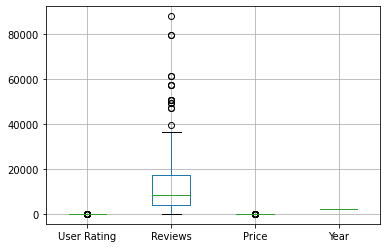

In [9]:
data.boxplot()


Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. A box plot is a method for graphically depicting groups of numerical data through their quartiles.

boxplot() method can be a Numpy array or Python list or Tuple of arrays. Let us create the box plot by using numpy. random. normal() to create some random data, it takes mean, standard deviation, and the desired number of values as arguments



In [10]:
data.describe()


,User Rating,Reviews,Price,Year
count,549.000000,549.000000,549.000000,549.000000
mean,4.618215,11948.950820,13.109290,2013.990893
std,0.227161,11741.390605,10.849959,3.160822
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4028.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17323.000000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std,min,max,count....etc. of a data frame or a series of numeric values.



In [11]:
data.hist


<bound method hist_frame of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
544                                             Wonder   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson      

In [12]:
data_new=data [data ['Price'] == 0]


In [13]:
data_new


,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [14]:
data_new.count()


Name           12
Author         12
User Rating    12
Reviews        12
Price          12
Year           12
Genre          12
dtype: int64

In [15]:
data.isnull()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
544,False,False,False,False,False,False,False
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False


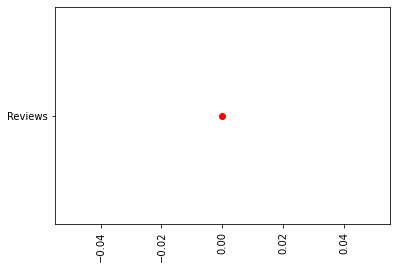

In [16]:
plt.plot("Reviews","ro")
plt.xticks(rotation =90)
plt.show()


Import pyplot from Matplotlib and visualize our DataFrame: import pandas as pd. import matplotlib.pyplot as plt. ... import pandas as pd. import matplotlib.pyplot as plt. df = pd.read_csv('data.csv') ... A scatterplot where there are no relationship between the columns: import pandas as pd. Whether you’re just getting to know a dataset or preparing to publish your findings, visualization is an essential tool. Python’s popular data analysis library, pandas, provides several different options for visualizing your data with .plot(). Even if you’re at the beginning of your pandas journey, you’ll soon be creating basic plots that will yield valuable insights into your data.



In [17]:
data.isnull().sum()


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Syntax: Pandas.isnull(“DataFrame Name”) or DataFrame.isnull() Parameters: Object to check null values for. Return Type: Dataframe of Boolean values which are True for NaN values. sum() function return the sum of the values for the requested axis. If the input is index axis then it adds all the values in a column and repeats the same for all the columns and returns a series containing the sum of all the values in each column.



array([[<AxesSubplot:title={'center':'User Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

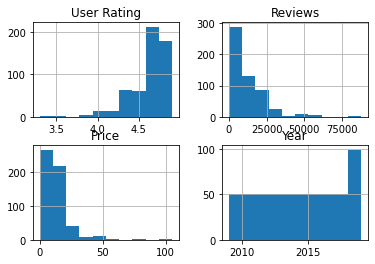

In [18]:
data.hist()


# The dataset used in this project was downloaded from : https://www.kaggle.com/datasets?fileType=csv

